In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Reading the data
data=pd.read_csv(r"C:\Users\Akshaya\Desktop\python-great lakes\CAPSTONE\data\listings_summary - Copy.csv")

In [3]:
data.head()

,host_since,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,39678.0,t,t,10119,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,...,9.0,10.0,10.0,10.0,9.0,t,f,f,strict_14_with_grace_period,3.76
1,39707.0,f,t,10437,52.548513,13.404553,t,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,10.0,t,f,f,flexible,1.42
2,39740.0,f,t,10405,52.534996,13.417579,t,Apartment,Entire home/apt,4,...,9.0,9.0,9.0,10.0,9.0,t,t,f,strict_14_with_grace_period,1.25
3,39759.0,f,t,10777,52.498855,13.349065,t,Apartment,Private room,2,...,9.0,9.0,10.0,9.0,9.0,t,f,f,strict_14_with_grace_period,0.39
4,39949.0,t,t,10437,52.543157,13.415091,t,Apartment,Private room,2,...,10.0,10.0,10.0,10.0,9.0,t,f,f,moderate,1.75


In [4]:
data.info()
data.isnull().sum()[data.isnull().sum()>0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 34 columns):
host_since                     22526 non-null float64
host_is_superhost              22526 non-null object
host_identity_verified         22526 non-null object
zipcode                        21896 non-null object
latitude                       22552 non-null float64
longitude                      22552 non-null float64
is_location_exact              22552 non-null object
property_type                  22552 non-null object
room_type                      22552 non-null object
accommodates                   22552 non-null int64
bathrooms                      22520 non-null float64
bedrooms                       22534 non-null float64
beds                           22512 non-null float64
bed_type                       22552 non-null object
amenities                      22552 non-null object
price                          22552 non-null object
cleaning_fee                   15406 n

host_since                       26
host_is_superhost                26
host_identity_verified           26
zipcode                         656
bathrooms                        32
bedrooms                         18
beds                             40
cleaning_fee                   7146
first_review                   3914
last_review                    3908
review_scores_rating           4389
review_scores_accuracy         4414
review_scores_cleanliness      4411
review_scores_checkin          4432
review_scores_communication    4418
review_scores_location         4431
review_scores_value            4435
reviews_per_month              3914
dtype: int64

In [5]:
data1=data[data['host_since'].notna()]

In [6]:
data1.isnull().sum()[data1.isnull().sum()>0]

zipcode                         656
bathrooms                        32
bedrooms                         18
beds                             40
cleaning_fee                   7133
first_review                   3903
last_review                    3897
review_scores_rating           4376
review_scores_accuracy         4401
review_scores_cleanliness      4398
review_scores_checkin          4419
review_scores_communication    4405
review_scores_location         4418
review_scores_value            4422
reviews_per_month              3903
dtype: int64

In [7]:
## Data Cleaning
data1['bathrooms']=np.ceil(data1['bathrooms'])
data1['bedrooms']=np.ceil(data1['bedrooms'])
data1['beds']=np.ceil(data1['beds'])

In [8]:
## The bathrooms and bedrooms in the data is float. By applying ceil we round the numbers to the lower number.

In [9]:
data1['bedrooms'].fillna(1,inplace=True)
data1['bathrooms'].fillna(1,inplace=True)
data1['beds'].fillna(1,inplace=True)

In [10]:
## Assuming the number of missing values is very less we fill with the fact that atleast 1 bathroom/bedroom/bed is present. This may not be true in the case of caves, tents.

In [11]:
data1.drop(['first_review','last_review','reviews_per_month'],axis=1,inplace=True)

In [12]:
data1['cleaning_fee']=data1['cleaning_fee'].str.lstrip('$').astype(float)

In [13]:
a=data1.groupby(by='bedrooms')['cleaning_fee'].agg('mean')

In [14]:
## Taking the average of the cleaning fee based on the number of rooms to fill the missing values
data1['cleaning_fee'].loc[(data1['bedrooms']==0) & (data1['cleaning_fee'].isna())]=27.762408
data1['cleaning_fee'].loc[(data1['bedrooms']==1) & (data1['cleaning_fee'].isna())]=22.488049
data1['cleaning_fee'].loc[(data1['bedrooms']==2) & (data1['cleaning_fee'].isna())]=42.209992
data1['cleaning_fee'].loc[(data1['bedrooms']==3) & (data1['cleaning_fee'].isna())]=54.526167
data1['cleaning_fee'].loc[(data1['bedrooms']==4) & (data1['cleaning_fee'].isna())]=67.542254
data1['cleaning_fee'].loc[(data1['bedrooms']==5) & (data1['cleaning_fee'].isna())]=77.571429
data1['cleaning_fee'].loc[(data1['bedrooms']==6) & (data1['cleaning_fee'].isna())]=74.416667
data1['cleaning_fee'].loc[(data1['bedrooms']==7) & (data1['cleaning_fee'].isna())]=73.833333
data1['cleaning_fee'].loc[(data1['bedrooms']==8) & (data1['cleaning_fee'].isna())]=86.666667
data1['cleaning_fee'].loc[(data1['bedrooms']==9) & (data1['cleaning_fee'].isna())]=103.745
data1['cleaning_fee'].loc[(data1['bedrooms']==10) & (data1['cleaning_fee'].isna())]=120.83
data1['cleaning_fee'].loc[(data1['bedrooms']==12) & (data1['cleaning_fee'].isna())]=155.000000

In [15]:
# The missing values in review_scores_communication is filled with 10 for those who were super hosts

data1['review_scores_communication'].loc[(data1['host_is_superhost']=='t') & (data1['review_scores_communication'].isna())]=10

In [16]:
## Filling the values of the following columns based on the proportion of the discrete values in the data
data1['review_scores_communication'].fillna(10,limit=3621,inplace=True)
data1['review_scores_communication'].fillna(5,limit=2,inplace=True)
data1['review_scores_communication'].fillna(9,limit=614,inplace=True)
data1['review_scores_communication'].fillna(2,limit=7,inplace=True)
data1['review_scores_communication'].fillna(4,limit=4,inplace=True)
data1['review_scores_communication'].fillna(7,limit=21,inplace=True)
data1['review_scores_communication'].fillna(8,limit=127,inplace=True)
data1['review_scores_communication'].fillna(6,limit=24,inplace=True)

data1['review_scores_value'].fillna(5,limit=5,inplace=True)
data1['review_scores_value'].fillna(10,limit=33,inplace=True)
data1['review_scores_value'].fillna(6,limit=44,inplace=True)
data1['review_scores_value'].fillna(8,limit=329,inplace=True)
data1['review_scores_value'].fillna(4,limit=8,inplace=True)
data1['review_scores_value'].fillna(10,limit=1500,inplace=True)
data1['review_scores_value'].fillna(2,limit=8,inplace=True)
data1['review_scores_value'].fillna(7,limit=39,inplace=True)
data1['review_scores_value'].fillna(10,limit=1000,inplace=True)
data1['review_scores_value'].fillna(9,limit=1620,inplace=True)

data1['review_scores_location'].fillna(7,limit=25,inplace=True)
data1['review_scores_location'].fillna(2,limit=2,inplace=True)
data1['review_scores_location'].fillna(10,limit=750,inplace=True)
data1['review_scores_location'].fillna(9,limit=135,inplace=True)
data1['review_scores_location'].fillna(4,limit=6,inplace=True)
data1['review_scores_location'].fillna(6,limit=30,inplace=True)
data1['review_scores_location'].fillna(10,limit=1544,inplace=True)
data1['review_scores_location'].fillna(8,limit=237,inplace=True)
data1['review_scores_location'].fillna(5,limit=2,inplace=True)
data1['review_scores_location'].fillna(9,limit=1000,inplace=True)
data1['review_scores_location'].fillna(10,limit=850,inplace=True)

data1['review_scores_checkin'].fillna(9,limit=500,inplace=True)
data1['review_scores_checkin'].fillna(6,limit=28,inplace=True)
data1['review_scores_checkin'].fillna(10,limit=1500,inplace=True)
data1['review_scores_checkin'].fillna(8,limit=137,inplace=True)
data1['review_scores_checkin'].fillna(5,limit=3,inplace=True)
data1['review_scores_checkin'].fillna(4,limit=5,inplace=True)
data1['review_scores_checkin'].fillna(10,limit=1900,inplace=True)
data1['review_scores_checkin'].fillna(9,limit=187,inplace=True)
data1['review_scores_checkin'].fillna(7,limit=21,inplace=True)
data1['review_scores_checkin'].fillna(2,limit=7,inplace=True)
data1['review_scores_checkin'].fillna(10,limit=495,inplace=True)

data1['review_scores_cleanliness'].fillna(3,limit=2,inplace=True)
data1['review_scores_cleanliness'].fillna(8,limit=429,inplace=True)
data1['review_scores_cleanliness'].fillna(7,limit=101,inplace=True)
data1['review_scores_cleanliness'].fillna(5,limit=13,inplace=True)
data1['review_scores_cleanliness'].fillna(9,limit=428,inplace=True)
data1['review_scores_cleanliness'].fillna(10,limit=1500,inplace=True)
data1['review_scores_cleanliness'].fillna(6,limit=72,inplace=True)
data1['review_scores_cleanliness'].fillna(2,limit=10,inplace=True)
data1['review_scores_cleanliness'].fillna(9,limit=800,inplace=True)
data1['review_scores_cleanliness'].fillna(10,limit=1045,inplace=True)
data1['review_scores_cleanliness'].fillna(4,limit=15,inplace=True)

data1['review_scores_accuracy'].fillna(2,limit=7,inplace=True)
data1['review_scores_accuracy'].fillna(10,limit=1419,inplace=True)
data1['review_scores_accuracy'].fillna(7,limit=25,inplace=True)
data1['review_scores_accuracy'].fillna(9,limit=367,inplace=True)
data1['review_scores_accuracy'].fillna(4,limit=9,inplace=True)
data1['review_scores_accuracy'].fillna(8,limit=166,inplace=True)
data1['review_scores_accuracy'].fillna(10,limit=1400,inplace=True)
data1['review_scores_accuracy'].fillna(5,limit=4,inplace=True)
data1['review_scores_accuracy'].fillna(6,limit=24,inplace=True)
data1['review_scores_accuracy'].fillna(10,limit=600,inplace=True)
data1['review_scores_accuracy'].fillna(9,limit=400,inplace=True)


Though it is a kind of random filling, it has an underlying fact that the proportion of a score stays the same before and after filling the empty entries.
The proportion of missing values is less. Hence we assume there will not be a significant impact on the end result.

In [17]:
a=pd.DataFrame((data1['review_scores_rating'].value_counts()*data1['review_scores_rating'].isna().sum())/data1['review_scores_rating'].value_counts().sum())
a.reset_index(inplace=True)
a['review_scores_rating']=np.round(a.review_scores_rating).astype(int)
limit = list(a.review_scores_rating)
value = list(a['index'])
for i,j in zip(limit,value):
    if i>0:
        data1['review_scores_rating'].fillna(j,limit=i,inplace=True)

In [18]:
data1.drop('is_business_travel_ready',axis=1,inplace=True)

In [19]:
data1['host_is_superhost'] = data1['host_is_superhost'].map({'f':0,'t':1})
data1['instant_bookable'] = data1['instant_bookable'].map({'f':0,'t':1})
data1['host_identity_verified'] = data1['host_identity_verified'].map({'f':0,'t':1})

In [20]:
data1['price'] = data1['price'].str.replace('$', '').str.replace(',', '').astype(float)
data1['extra_people'] = data1['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)

In [21]:
data1.drop('requires_license',axis=1,inplace=True)

In [22]:
data1.head()

,host_since,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,39678.0,1,1,10119,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,...,118,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period
1,39707.0,0,1,10437,52.548513,13.404553,t,Apartment,Private room,2,...,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible
2,39740.0,0,1,10405,52.534996,13.417579,t,Apartment,Entire home/apt,4,...,143,92.0,9.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period
3,39759.0,0,1,10777,52.498855,13.349065,t,Apartment,Private room,2,...,25,88.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period
4,39949.0,1,1,10437,52.543157,13.415091,t,Apartment,Private room,2,...,197,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate


## Visualizations

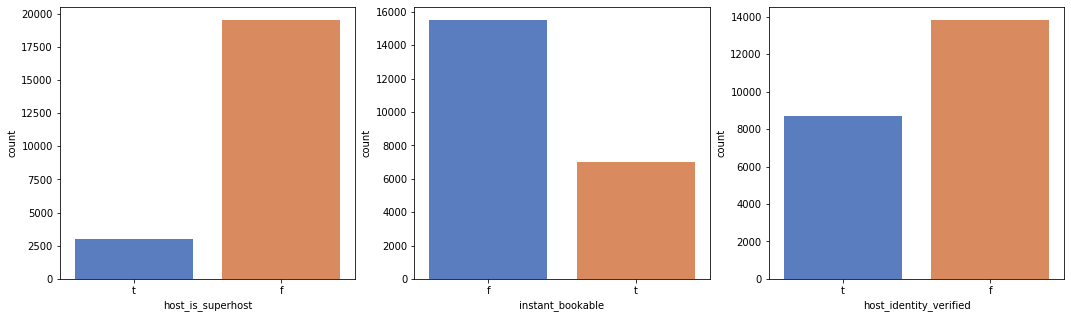

In [23]:
fig,ax = plt.subplots(1,3,figsize=(18,5))
k=0
for i in ['host_is_superhost','instant_bookable','host_identity_verified']:
    sns.countplot(data[i],ax=ax[k],palette='muted')
    k+=1

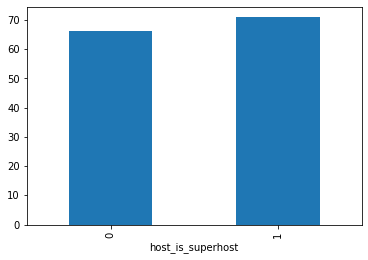

host_is_superhost
0    66.133590
1    70.902358
Name: price, dtype: float64


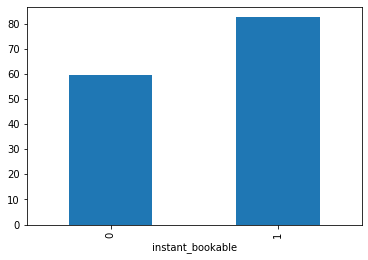

instant_bookable
0    59.671657
1    82.419915
Name: price, dtype: float64


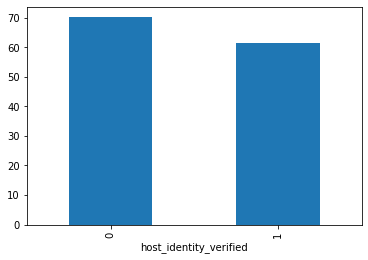

host_identity_verified
0    70.175854
1    61.362101
Name: price, dtype: float64


In [24]:
for i in ['host_is_superhost','instant_bookable','host_identity_verified']:
    (data1.groupby(i)['price'].agg('mean')).plot(kind='bar')
    plt.show()
    print((data1.groupby(i)['price'].agg('mean')))

In [25]:
## The average price is compared based on different statuses of host verification, super hosts and instant book facility.

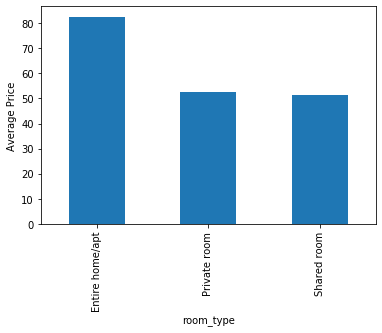

room_type
Entire home/apt    82.538519
Private room       52.505512
Shared room        51.564189
Name: price, dtype: float64


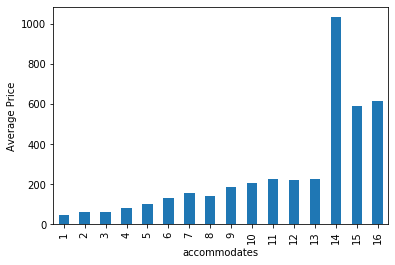

accommodates
1       44.292674
2       57.942130
3       59.835214
4       81.848381
5      101.834049
6      132.354707
7      152.687023
8      139.331126
9      187.305556
10     203.982456
11     226.400000
12     220.083333
13     225.000000
14    1033.909091
15     588.166667
16     611.950000
Name: price, dtype: float64


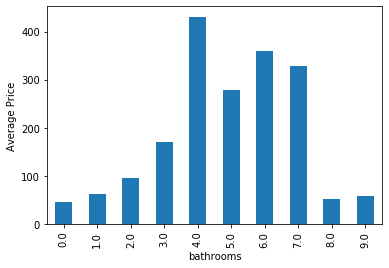

bathrooms
0.0     44.731707
1.0     62.425301
2.0     94.800166
3.0    169.766129
4.0    431.000000
5.0    278.000000
6.0    360.000000
7.0    329.000000
8.0     52.000000
9.0     58.333333
Name: price, dtype: float64


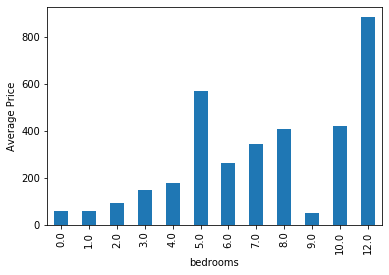

bedrooms
0.0      55.997288
1.0      57.423169
2.0      93.690003
3.0     147.475069
4.0     175.692308
5.0     571.941176
6.0     262.200000
7.0     346.333333
8.0     408.000000
9.0      50.000000
10.0    421.000000
12.0    885.000000
Name: price, dtype: float64


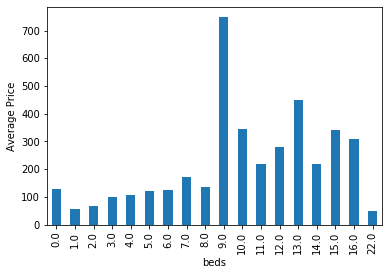

beds
0.0     127.625000
1.0      56.537577
2.0      68.502073
3.0     100.341499
4.0     105.168798
5.0     122.517375
6.0     123.630137
7.0     171.901639
8.0     135.250000
9.0     747.733333
10.0    345.913043
11.0    217.500000
12.0    280.500000
13.0    450.000000
14.0    220.000000
15.0    342.250000
16.0    310.000000
22.0     50.000000
Name: price, dtype: float64


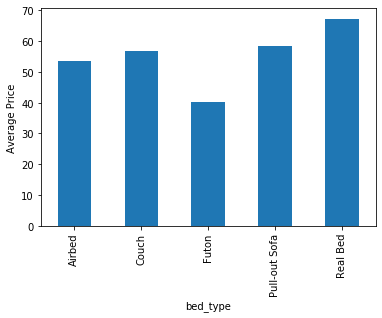

bed_type
Airbed           53.608696
Couch            56.791667
Futon            40.326360
Pull-out Sofa    58.277778
Real Bed         67.284472
Name: price, dtype: float64


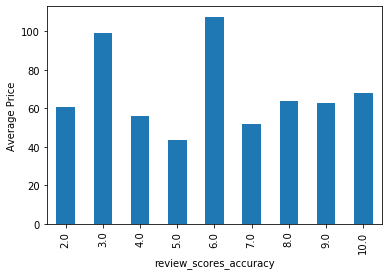

review_scores_accuracy
2.0      60.766667
3.0      99.000000
4.0      55.813953
5.0      43.727273
6.0     107.541667
7.0      51.717391
8.0      63.692391
9.0      62.633573
10.0     67.832446
Name: price, dtype: float64


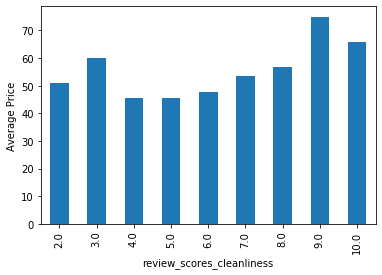

review_scores_cleanliness
2.0     50.959184
3.0     59.857143
4.0     45.461538
5.0     45.557377
6.0     47.589421
7.0     53.535238
8.0     56.770672
9.0     74.956311
10.0    65.812485
Name: price, dtype: float64


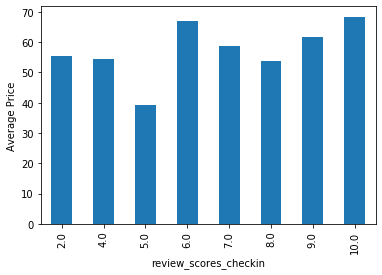

review_scores_checkin
2.0     55.333333
4.0     54.500000
5.0     39.181818
6.0     66.977273
7.0     58.697248
8.0     53.858146
9.0     61.613487
10.0    68.446586
Name: price, dtype: float64


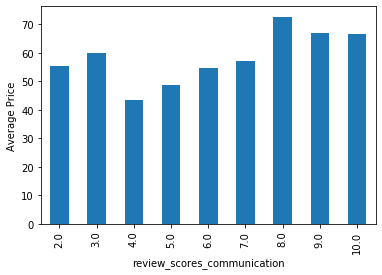

review_scores_communication
2.0     55.400000
3.0     60.000000
4.0     43.333333
5.0     48.615385
6.0     54.613636
7.0     56.991525
8.0     72.629008
9.0     66.977711
10.0    66.707939
Name: price, dtype: float64


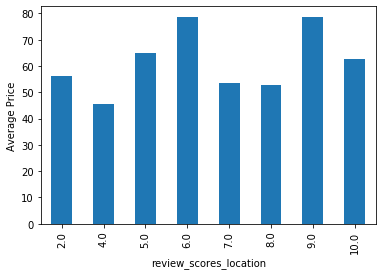

review_scores_location
2.0     56.100000
4.0     45.466667
5.0     65.000000
6.0     78.765060
7.0     53.600000
8.0     52.847570
9.0     78.629457
10.0    62.601145
Name: price, dtype: float64


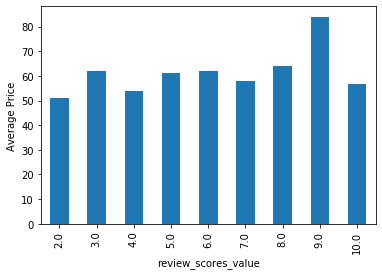

review_scores_value
2.0     51.129032
3.0     62.000000
4.0     53.790698
5.0     61.352941
6.0     61.946667
7.0     58.010000
8.0     63.944819
9.0     84.020434
10.0    56.691241
Name: price, dtype: float64


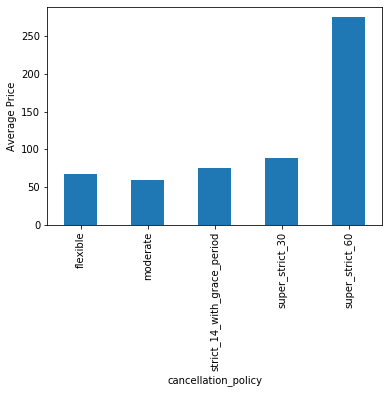

cancellation_policy
flexible                        66.570626
moderate                        59.377327
strict_14_with_grace_period     74.763845
super_strict_30                 87.811321
super_strict_60                274.928571
Name: price, dtype: float64


In [26]:
cate_cols=['room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value', 'cancellation_policy']
for i in cate_cols:
    (data1.groupby(i)['price'].agg('mean')).plot(kind='bar')
    plt.ylabel('Average Price')
    plt.show()
    print((data1.groupby(i)['price'].agg('mean')))

In [27]:
## We compare the average price amongst different values in the particular variable.

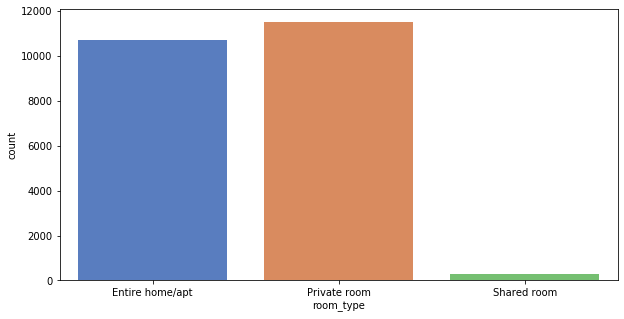

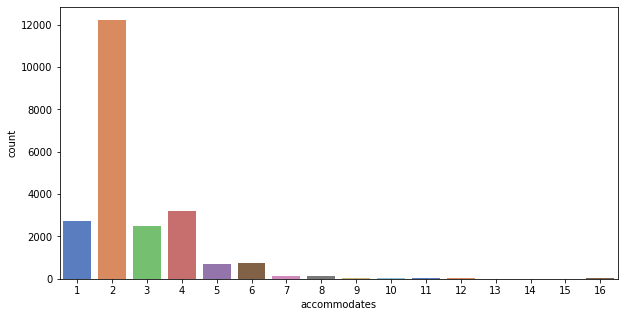

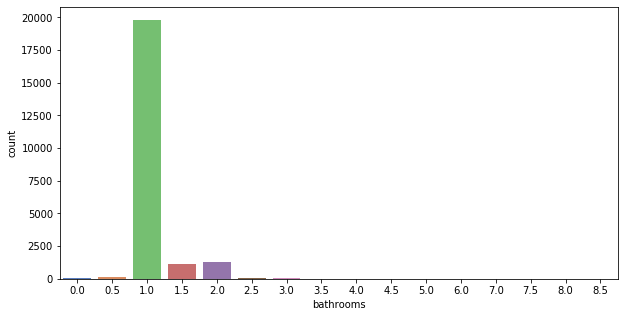

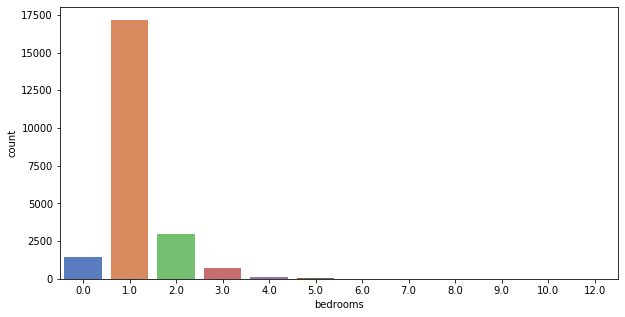

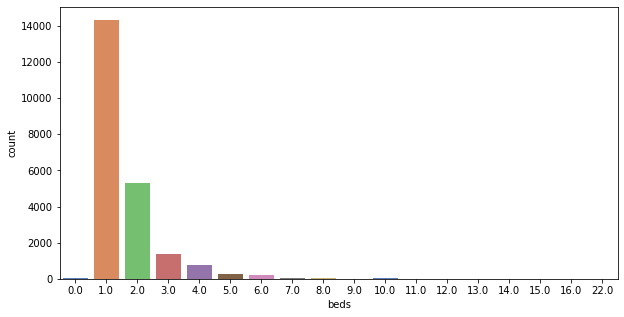

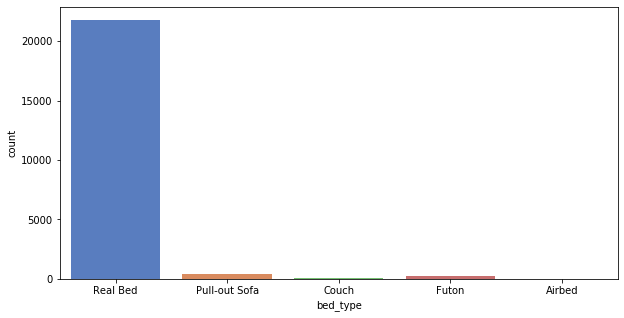

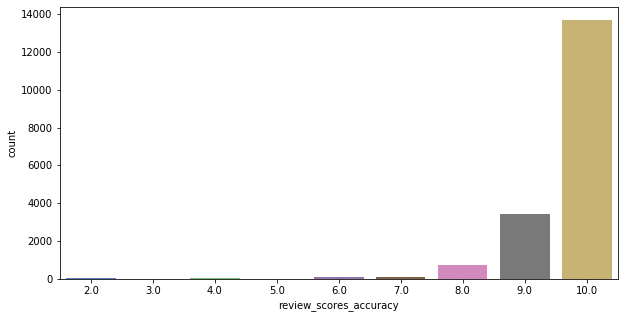

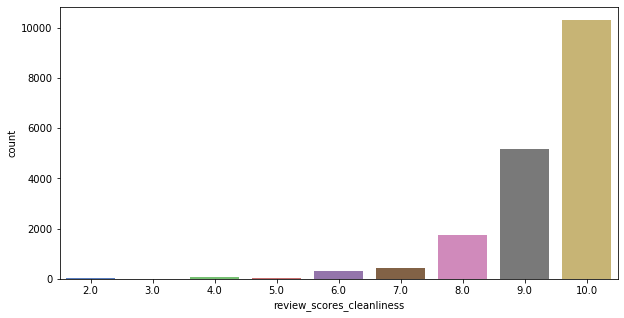

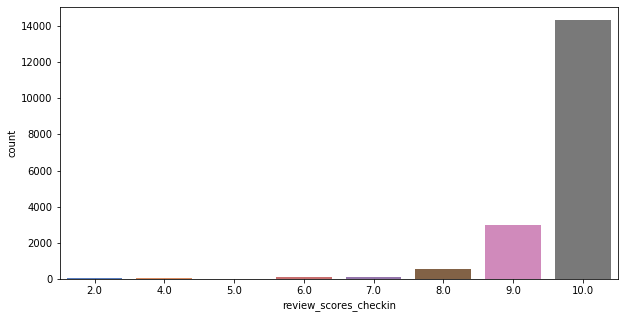

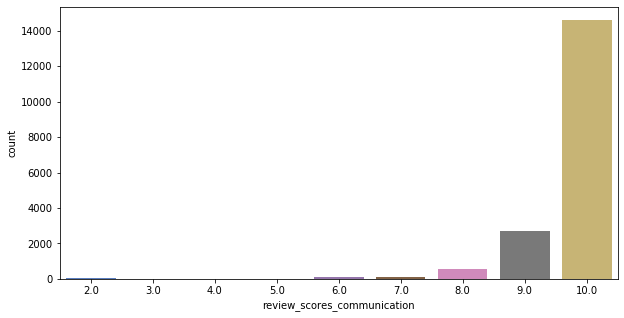

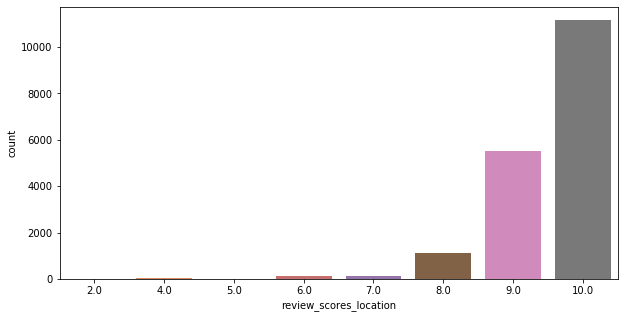

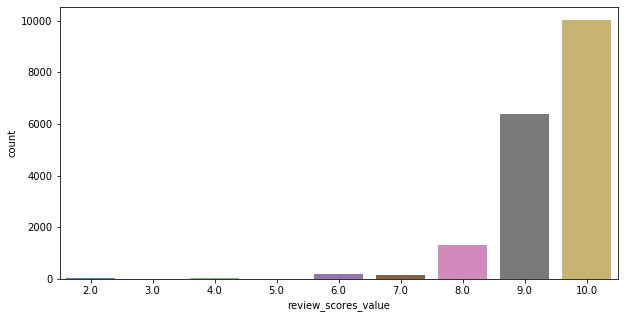

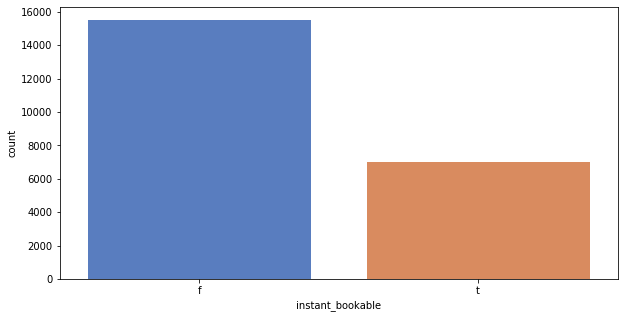

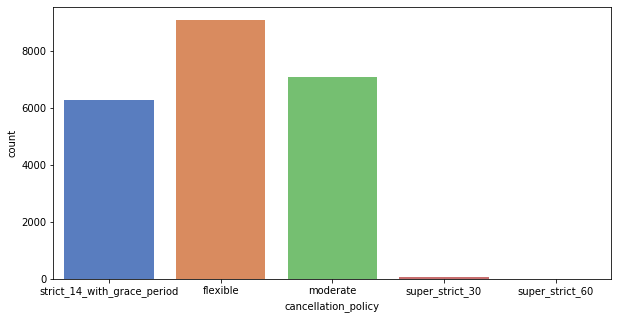

In [28]:
cate_cols=['room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value', 'instant_bookable', 'cancellation_policy']
for i in cate_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(data[i],palette='muted')
    plt.show()

In [29]:
## We are comparing the number of record under each variable category.

cancellation_policy
flexible                        66.570626
moderate                        59.377327
strict_14_with_grace_period     74.763845
super_strict_30                 87.811321
super_strict_60                274.928571
Name: price, dtype: float64


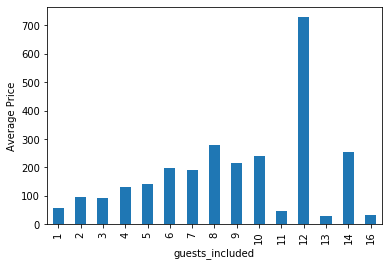

In [30]:
## The average price based on the number of guests included in the booking.
(data1.groupby('guests_included')['price'].agg('mean')).plot(kind='bar')
plt.ylabel('Average Price')
print((data1.groupby(i)['price'].agg('mean')))

In [31]:
data1['guests_included'].loc[data1['guests_included']==200]=2

In [32]:
data1.drop(['number_of_reviews','host_since'],axis=1,inplace=True)

In [33]:
## Working with a string column- amenities- same facilities with different names are corrected.
data1['amenities']=data1['amenities'].str.replace('Cable TV','TV')
data1['amenities']=data1['amenities'].str.replace('Convection oven','Microwave')
data1['amenities']=data1['amenities'].str.replace('Ethernet connection','Internet')
data1['amenities']=data1['amenities'].str.replace('Kitchenette','Kitchen')
data1['amenities']=data1['amenities'].str.replace('Pets live on this property','Pets allowed')
data1['amenities']=data1['amenities'].str.replace('Cat(s)','Pets allowed')
data1['amenities']=data1['amenities'].str.replace('Dog(s)','Pets allowed')
data1['amenities']=data1['amenities'].str.replace('Washer / Dryer','washer / dryer')
data1['amenities']=data1['amenities'].str.replace('Dryer','washer / dryer')
data1['amenities']=data1['amenities'].str.replace('Washer','washer / dryer')

In [34]:
## Cleaning of the feature-amenities
data1['amenities']=data1['amenities'].str.replace('{','')
data1['amenities']=data1['amenities'].str.replace('}','')
data1['amenities']=data1['amenities'].str.replace('"','')
data1['amenities']=data1['amenities'].str.replace("'",'')
data1['amenities']=data1['amenities'].str.split(',')

In [35]:
for i in data1['amenities']:
    for j in i:
        if j=='Cable TV':
            j.replace('Cable TV','TV')
        elif j=='Convection oven':
            j.replace('Convection oven','Microwave')
        elif j=='Ethernet connection':
            j.replace('Ethernet connection','Internet')
        elif j=='Kitchenette':
            j.replace('Kitchenette','Kitchen')
        elif j=='Pets live on this property':
            j.replace('Pets live on this property','Pets allowed')
        elif j=='Cat(s)':
            j.replace('Cat(s)','Pets allowed')
        elif j=='Dog(s)':
            j.replace('Dog(s)','Pets allowed')
        elif j=='Washer / Dryer':
            j.replace('Washer / Dryer','washer / dryer')
        elif j=='Dryer':
            j.replace('Dryer','washer / dryer')
        elif j=='Washer':
            j.replace('Dryer','washer / dryer')

In [36]:
## Identifying unique amenities
a_list=[]
for i in data1['amenities']:
    for j in i:
        a_list.append(j)

In [37]:
len(set(a_list))

129

In [38]:
# 129 unique amenities are provided by the hosts.

In [39]:
# Creating a new column which gives us the number of unique features provided by the hosts
data1['No_of_amenities']=list(map(lambda x: len(set(x)), data1['amenities']))

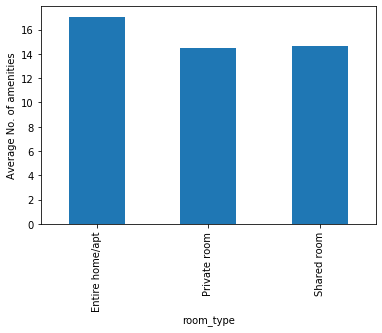

room_type
Entire home/apt    17.056401
Private room       14.481642
Shared room        14.638514
Name: No_of_amenities, dtype: float64


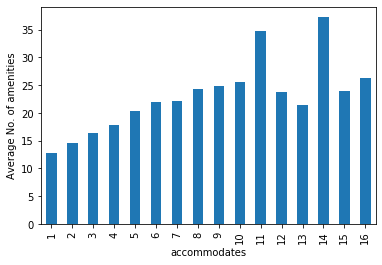

accommodates
1     12.835165
2     14.660391
3     16.428284
4     17.867061
5     20.434907
6     21.982265
7     22.114504
8     24.264901
9     24.861111
10    25.578947
11    34.666667
12    23.708333
13    21.500000
14    37.272727
15    24.000000
16    26.300000
Name: No_of_amenities, dtype: float64


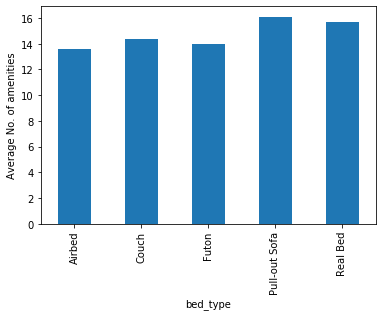

bed_type
Airbed           13.565217
Couch            14.402778
Futon            13.949791
Pull-out Sofa    16.106667
Real Bed         15.725416
Name: No_of_amenities, dtype: float64


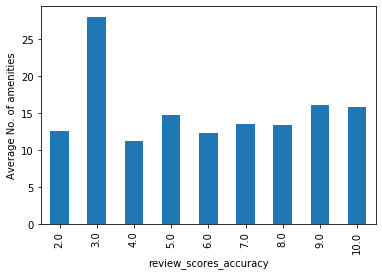

review_scores_accuracy
2.0     12.500000
3.0     28.000000
4.0     11.209302
5.0     14.727273
6.0     12.308333
7.0     13.442029
8.0     13.406522
9.0     16.009592
10.0    15.817001
Name: No_of_amenities, dtype: float64


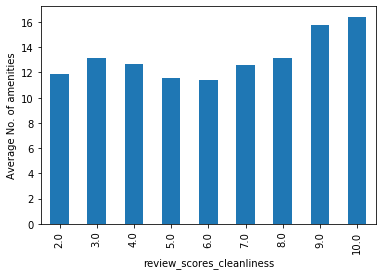

review_scores_cleanliness
2.0     11.897959
3.0     13.142857
4.0     12.630769
5.0     11.540984
6.0     11.423174
7.0     12.582857
8.0     13.129283
9.0     15.789383
10.0    16.417919
Name: No_of_amenities, dtype: float64


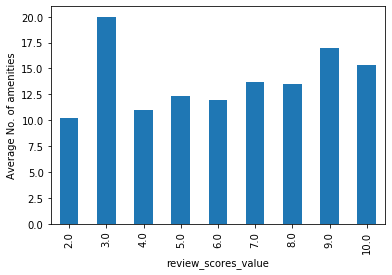

review_scores_value
2.0     10.258065
3.0     20.000000
4.0     10.953488
5.0     12.352941
6.0     11.924444
7.0     13.740000
8.0     13.456162
9.0     16.987867
10.0    15.334423
Name: No_of_amenities, dtype: float64


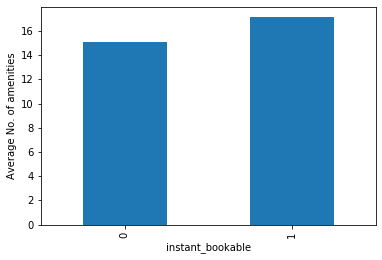

instant_bookable
0    15.066791
1    17.120626
Name: No_of_amenities, dtype: float64


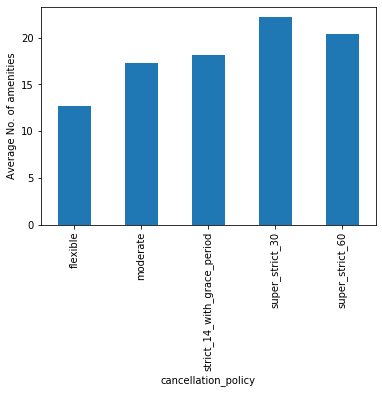

cancellation_policy
flexible                       12.735220
moderate                       17.332205
strict_14_with_grace_period    18.105983
super_strict_30                22.169811
super_strict_60                20.428571
Name: No_of_amenities, dtype: float64


In [40]:
## Calculating the average no of facilities provided, based on the different features.
cate_cols=['room_type', 'accommodates', 'bed_type','review_scores_accuracy','review_scores_cleanliness','review_scores_value', 'instant_bookable', 'cancellation_policy']
for i in cate_cols:
    (data1.groupby(i)['No_of_amenities'].agg('mean')).plot(kind='bar')
    plt.ylabel('Average No. of amenities')
    plt.show()
    print((data1.groupby(i)['No_of_amenities'].agg('mean')))

In [41]:
data1['price'].loc[data1['price']<=1]=data1['price'].median()

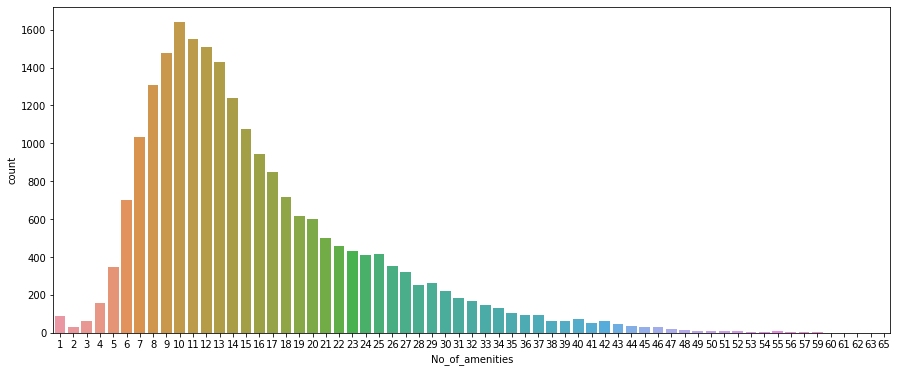

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(data1['No_of_amenities'])

In [43]:
## Most of our hosts provide about 8-15 amenities

In [44]:
data1.head()

,host_is_superhost,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,No_of_amenities
0,1,1,10119,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,...,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,28
1,0,1,10437,52.548513,13.404553,t,Apartment,Private room,2,1.0,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,10
2,0,1,10405,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,...,92.0,9.0,9.0,9.0,9.0,10.0,9.0,1,strict_14_with_grace_period,19
3,0,1,10777,52.498855,13.349065,t,Apartment,Private room,2,1.0,...,88.0,9.0,9.0,9.0,10.0,9.0,9.0,0,strict_14_with_grace_period,28
4,1,1,10437,52.543157,13.415091,t,Apartment,Private room,2,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,9.0,0,moderate,13


In [45]:
data1.to_csv('final_data_used-EDA.csv')